In [90]:
import os
import pandas as pd
import yaml

%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

In [94]:
import json

mszny_dir = "../../morph_disambig/szeged_morph_disambig_corp/"
szeged_df = None
szeged_cols = [
    "token", "lemma", "old_pos", "ud", "szeged_conv", "match_type",
    "segmentation", "hfst_tags", "hfst_tapes", "hfst_other_ana",
]
    
for fn in os.listdir(mszny_dir):
    print(fn)
    fn = os.path.join(mszny_dir, fn)
    df = pd.read_table(fn, sep="\t", names=szeged_cols, quoting=3)
    if szeged_df is None:
        szeged_df = df
    else:
        szeged_df = pd.concat((szeged_df, df))

szeged_df["hfst_other_ana"] = szeged_df["hfst_other_ana"].apply(json.loads)
szeged_df.head()

8oelb.conll-2009_ready.disamb.new
10elb.conll-2009_ready.disamb.new
10erv.conll-2009_ready.disamb.new
1984.conll-2009_ready.disamb.new
cwszt.conll-2009_ready.disamb.new
gazdtar.conll-2009_ready.disamb.new
hvg.conll-2009_ready.disamb.new
mh.conll-2009_ready.disamb.new
newsml.conll-2009_ready.disamb.new
np.conll-2009_ready.disamb.new
nv.conll-2009_ready.disamb.new
pfred.conll-2009_ready.disamb.new
szerzj.conll-2009_ready.disamb.new
utas.conll-2009_ready.disamb.new
win2000.conll-2009_ready.disamb.new


,token,lemma,old_pos,ud,szeged_conv,match_type,segmentation,hfst_tags,hfst_tapes,hfst_other_ana
0,A,a,T,SubPOS=f,a[/Det|art.Def],single_full_match,a,[/Det|Art.Def],a:a :[/Det|Art.Def],"[[A, [/N|Unit|Abbr] [Nom], A:A :[/N|Unit|Abbr]..."
1,múlt,múlt,A,SubPOS=f|Deg=p|Num=s|Cas=n|NumP=none|PerP=none...,múlt[/Adj][Nom],diff1_mult2,múlt,[/Adj|Attr],m:m ú:ú l:l t:t :[/Adj|Attr],"[[múl t, [/V] [Pst.NDef.3Sg], m:m ú:ú l:l :[/V..."
2,héten,hét,N,SubPOS=c|Num=s|Cas=p|NumP=none|PerP=none|NumPd...,hét[/N][Supe],single_full_match,hét en,[/N] [Supe],h:h é:é t:t :[/N] e:e n:n :[Supe],"[[hét en, [/Num] [Supe], h:h é:é t:t :[/Num] e..."
3,a,a,T,SubPOS=f,a[/Det|art.Def],single_full_match,a,[/Det|Art.Def],a:a :[/Det|Art.Def],"[[a, [/Det|Pro|(Post)], a:a :[/Det|Pro|(Post)]..."
4,családommal,család,N,SubPOS=c|Num=s|Cas=i|NumP=s|PerP=1|NumPd=none,család[/N][Poss.1Sg][Ins],single_full_match,család om mal,[/N] [Poss.1Sg] [Ins],c:c s:s a:a l:l á:á d:d :[/N] o:o m:m :[Poss.1...,[]


In [95]:
d = szeged_df[szeged_df["szeged_conv"] != "OTHER"]["match_type"].value_counts()
(d / d.sum() * 100).head(10).to_frame()

,match_type
single_full_match,81.887399
diff1_mult1,9.241657
diff2_mult1,2.484471
diff1_mult2,1.628123
diff3_mult1,0.958410
multiple_full_match,0.950983
diff2_mult2,0.891646
diff1_mult3,0.731366
diff3_mult2,0.540578
diff4_mult1,0.246451


In [97]:
filt = "diff1_mult1"
f = szeged_df[(szeged_df["szeged_conv"] != "OTHER") & (szeged_df["match_type"] == filt)]
f = f.sample(10)
f[["token", "szeged_conv", "hfst_tags", "hfst_tapes"]]

,token,szeged_conv,hfst_tags,hfst_tapes
70542,Felnőtt,felnő[/V][Pst.NDef.3Sg],[/Prev] [/V] [Pst.NDef.3Sg],f:f e:e l:l :[/Prev] n:n ő:ő :[/V] t:t t:t :[P...
55366,Összepakolta,összepakol[/V][Pst.Def.3Sg],[/Prev] [/V] [Pst.Def.3Sg],ö:ö s:s s:s z:z e:e :[/Prev] p:p a:a k:k o:o l...
5060,Amir,Amir[/N],NaN,Amir+?
78224,xyz.com,xyz.com[/N],NaN,xyz.com+?
39151,vannak,van[/V][Prs.NDef.3Pl],[/V] [,v:v a:a n:n :[/V] n:n a:a k:k :[ :P :r :s :. :...
10094,szlovák,szlovák[/Adj][Nom],[/Adj|nat] [Nom],s:s z:z l:l o:o v:v á:á k:k :[/Adj|nat] :[Nom]
142057,élhetnek,él[/V][_Mod/V][Prs.NDef.3Pl],[/V] [_Mod/V] [,é:é l:l :[/V] h:h e:e t:t :[_Mod/V] n:n e:e k:...
723,47-re,47[/Num|Digit][Subl],[/Num|Digit] [/Num|Digit] [Subl],4:4 :[/Num|Digit] 7:7 -: :[/Num|Digit] r:r e:e...
101050,megfelelő,megfelelő[/Adj][Nom],[/N] [Nom],m:m e:e g:g f:f e:e l:l e:e l:l ő:ő :[/N] :[Nom]
8993,leállítani,leállít[/V][Inf],[/Prev] [/V] [Inf],l:l e:e :[/Prev] á:á l:l l:l í:í t:t :[/V] a:a...


In [58]:
f[["hfst_tapes"]] #.str.split()

,hfst_tapes
160107,BBDSZSZ+?
13691,m:m e:e g:g :[/Prev] l:l e:e p:p :[/V] e:e m:m...
64925,L:L A:A N:N :[/N|Acron] :[Nom]
13968,v:v a:a l:l u:u t:t a:a :[/N] b:b e:e v:v é:é ...
121783,m:m e:e g:g :[/Prev] e:e b:b é:é d:d e:e l:l :...
80324,S:S z:z e:e n:n t:t e:e n:n d:d r:r é:e :[/N] ...
105199,e:e l:l :[/Prev] j:j á:á r:r :[/V] n:n i:i :[Inf]
20705,f:f ö:ö l:l :[/Prev] v:v e:e n:s :z :[/V] n:n ...
57206,s:s z:z o:o l:l g:g á:á l:l ó:ó :[/N] :[Nom]
40300,2:2 :[/Num|Digit] 8:8 :[/Num|Digit] :[Nom]


# Data stats

In [98]:
data_dir = "../data/szeged/train_test/"
train_fn = data_dir + "normalized.train"
test_fn = data_dir + "normalized.test"

df = pd.read_table(train_fn, names=['word', 'segmentation'])
df['test'] = False
df2 = pd.read_table(test_fn, names=['word', 'segmentation'])
df2['test'] = True

df = pd.concat([df, df2])
df = df.reset_index()
df.tail()

,index,word,segmentation,test
129432,9995,rakétabombák,BEEEEEBEEEEB,True
129433,9996,eliteket,BEEEBEBE,True
129434,9997,négytől,BEEEBEE,True
129435,9998,rosszal,BEEEEBE,True
129436,9999,sorakoztatja,BEEEEEEBEEBE,True


In [102]:
len(df) - len(df['word'].unique())

907

In [109]:
df[df['word'] == 'éjszaka']

,index,word,segmentation,test
4709,4709,éjszaka,BEBEEEB,False
128900,9463,éjszaka,BEEEEEE,True


In [110]:
df['word'].value_counts()

keleti              3
kivált              3
számba              3
szokott             2
nyelve              2
port                2
éjszaka             2
kötöttek            2
rettegett           2
mennyire            2
körúti              2
sokkal              2
felépült            2
kisebbségi          2
jelen               2
jobb                2
véletlenül          2
adatbázis-kezelő    2
választott          2
nyert               2
érte                2
vidám               2
fele                2
nevelt              2
mire                2
egyből              2
szintén             2
szelet              2
fejében             2
értünk              2
                   ..
sorakoztatták       1
autópályán          1
lettem              1
meghajtotta         1
lakhatnánk          1
records             1
egyéntől            1
pillantásokat       1
várakozók           1
kerületének         1
tóratekercs         1
felhajtás           1
határ               1
építményben         1
fészekben 

In [5]:
df['morph_count'] = df.segmentation.str.count('B')
df['word_length'] = df.word.str.len()

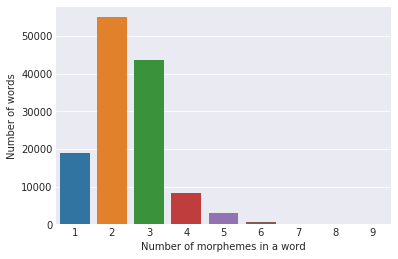

In [6]:
p = sns.countplot(df['morph_count'])
p.set_xlabel("Number of morphemes in a word")
p.set_ylabel("Number of words")
p.figure.savefig("szeged/morph_count_dist.png", dpi=900)

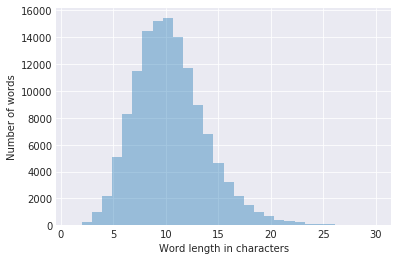

In [7]:
p = sns.distplot(df['word_length'], kde=False, bins=30)
p.set_xlabel("Word length in characters")
p.set_ylabel("Number of words")
p.figure.savefig("szeged/word_len_dist.png", dpi=900)

In [8]:
df['word_length'].mean() / df['morph_count'].mean()

4.252868811746346

# Results

In [9]:
result_dir = "../results/szeged/"

cnn_results = None
lstm_results = None

for fn in os.listdir(result_dir):
    if fn.startswith("cnn"):
        if cnn_results is None:
            cnn_results = pd.read_table(os.path.join(result_dir, fn))
        else:
            cnn_results = pd.concat(
                [cnn_results, pd.read_table(os.path.join(result_dir, fn))])
    elif fn.startswith("lstm"):
        if lstm_results is None:
            lstm_results = pd.read_table(os.path.join(result_dir, fn))
        else:
            lstm_results = pd.concat(
                [lstm_results, pd.read_table(os.path.join(result_dir, fn))])

In [10]:
exp_dir = "../exps/szeged/"

for exp_group in os.listdir(exp_dir):
    if not exp_group.startswith("lstm"):
        continue
    for exp_fn in os.listdir(os.path.join(exp_dir, exp_group)):
        try:
            with open(os.path.join(exp_dir, exp_group, exp_fn, "config.yaml")) as f:
                config = yaml.load(f)
            model_dir = config['model_dir']
            d = (lstm_results[lstm_results['config.model_dir'] == model_dir])
            if len(d) > 0:
                continue
            exp_dict = {'config.{}'.format(k): v for k, v in config.items()} 
            with open(os.path.join(exp_dir, exp_group, exp_fn, "result.yaml")) as f:
                result = yaml.load(f)
            exp_dict.update({'result.{}'.format(k): v for k, v in result.items()})
            lstm_results = lstm_results.append(exp_dict, ignore_index=True)
        except FileNotFoundError:
            print(exp_dir, exp_group, exp_fn)
lstm_results = lstm_results[lstm_results['config.model_dir'].notnull()]

In [11]:
def read_file_to_dict(stream):
    d = {}
    for line in stream:
        fd = line.strip().split("\t")
        d[fd[0]] = float(fd[1])
    return d

def read_results(model_dir):
    res = {}
    with open(os.path.join(model_dir, "szeged.test_morph_level_eval")) as f:
        d = read_file_to_dict(f)
        res.update({"morph.{}".format(k): v for k, v in d.items()})
        
    with open(os.path.join(model_dir, "szeged.test_boundary_eval")) as f:
        d = read_file_to_dict(f)
        res.update({"boundary.{}".format(k): v for k, v in d.items()})
    return res
              
all_cnn = []
for row in cnn_results.iterrows():
    res = read_results("../" + row[1]['config.model_dir'])
    res['config.model_dir'] = row[1]['config.model_dir']
    all_cnn.append(res)
    
all_cnn = pd.DataFrame(all_cnn)

In [12]:
all_lstm = []
cnt = 0
for row in lstm_results.iterrows():
    try:
        res = read_results("../" + row[1]['config.model_dir'])
        res['config.model_dir'] = row[1]['config.model_dir']
        all_lstm.append(res)
    except TypeError:
        cnt += 1
    
all_lstm = pd.DataFrame(all_lstm)

In [13]:
def len_or_neg(s):
    try:
        return len(eval(s))
    except TypeError:
        return len(s)
    
lstm_results = all_lstm.merge(lstm_results, left_on='config.model_dir', right_on='config.model_dir')
lstm_results['result.epochs_run'] = lstm_results['result.val_loss'].apply(len_or_neg)
lstm_results.to_csv("../results/szeged/merged/lstm_results.tsv", sep="\t", index=False)

In [14]:
cnn_results = all_cnn.merge(cnn_results, left_on='config.model_dir', right_on='config.model_dir')
cnn_results['result.epochs_run'] = cnn_results['result.val_loss'].apply(lambda x: len(eval(x)))
cnn_results.to_csv("../results/szeged/merged/cnn_results.tsv", sep="\t", index=False)

### Filter newer experiments

In [15]:
lstm_results = lstm_results[lstm_results['config.batch_size'] == 512]
cnn_results = cnn_results[cnn_results['config.batch_size'] == 512]

## Number of experiments

In [59]:
len(lstm_results), len(cnn_results)

(291, 299)

## Parameters

### RNN

In [113]:
cfg_cols = list(filter(lambda c: c.startswith("config."), lstm_results.columns))
var_cols = []

for colname in cfg_cols:
    uc = lstm_results[colname].dropna().unique()
    if len(uc) > 1 and len(uc) < len(lstm_results):
        var_cols.append({colname: sorted(list(uc))})
var_cols

[{'config.bidirectional': [0.0, 1.0]},
 {'config.cell_size': [8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]},
 {'config.cell_type': ['GRU', 'LSTM']},
 {'config.dataframe_path': ['results/szeged/lstm_fred_results.tsv',
   'results/szeged/lstm_results.tsv']},
 {'config.embedding_size': [5.0, 10.0, 20.0, 30.0, 40.0]},
 {'config.num_layers': [1.0, 2.0, 3.0]}]

In [114]:
2 * 7 * 2 * 5 * 3

420

## Early stopping

Most experiments stopped earlier than 100 epochs

In [17]:
d = (lstm_results['result.epochs_run'] < 100).value_counts() + (cnn_results['result.epochs_run'] < 100).value_counts()
print(d.sum())
d / d.sum()

590


True     0.620339
False    0.379661
Name: result.epochs_run, dtype: float64

## Best RNN

In [115]:
res_cols = [
    'boundary.precision',
    'boundary.recall',
    'boundary.F-score',
    'morph.accuracy',
    'morph.precision',
    'morph.recall',
    'morph.F-score',
    'morph.word_accuracy',
]

hp_params = [
    'cell_type', 'cell_size', 'embedding_size', 'bidirectional', 'num_layers', 'batch_size',
    'model_dir',
]
hp_params = ['config.{}'.format(c) for c in hp_params]

In [116]:
boundary_best = lstm_results[res_cols + hp_params].loc[lstm_results['boundary.F-score'].idxmax()].to_frame().dropna()
boundary_best

,13
boundary.precision,0.940408
boundary.recall,0.914391
boundary.F-score,0.927217
morph.accuracy,0.795461
morph.precision,0.893384
morph.recall,0.878894
morph.F-score,0.88608
morph.word_accuracy,0.8303
config.cell_type,GRU
config.cell_size,256


In [20]:
s = boundary_best.loc[res_cols].rename(
    columns={'morph.word_accuracy': 'word accuracy'}
).to_latex(header=False)
with open("szeged/rnn_best.tex", 'w') as f:
    f.write(s)

In [117]:
from keras.models import load_model

m = "../" + boundary_best.loc['config.model_dir'].iloc[0] + "/model.hdf5"
model = load_model(m)

KeyboardInterrupt: 

In [ ]:
model.summary()

In [23]:
from keras.utils import plot_model

plot_model(model)

In [24]:
morph_best = lstm_results[res_cols + hp_params].loc[lstm_results['morph.F-score'].idxmax()].to_frame().dropna()
morph_best

,13
boundary.precision,0.940408
boundary.recall,0.914391
boundary.F-score,0.927217
morph.accuracy,0.795461
morph.precision,0.893384
morph.recall,0.878894
morph.F-score,0.88608
morph.word_accuracy,0.8303
config.cell_type,GRU
config.cell_size,256


In [25]:
morph_best = lstm_results[res_cols + hp_params].loc[lstm_results['morph.word_accuracy'].idxmax()].to_frame().dropna()
morph_best

,13
boundary.precision,0.940408
boundary.recall,0.914391
boundary.F-score,0.927217
morph.accuracy,0.795461
morph.precision,0.893384
morph.recall,0.878894
morph.F-score,0.88608
morph.word_accuracy,0.8303
config.cell_type,GRU
config.cell_size,256


### Is unidirectional any good?

In [26]:
lstm_results.groupby('config.bidirectional').mean()[res_cols]

,boundary.precision,boundary.recall,boundary.F-score,morph.accuracy,morph.precision,morph.recall,morph.F-score,morph.word_accuracy
config.bidirectional,,,,,,,,
0.0,0.850461,0.778648,0.811779,0.561009,0.733953,0.698955,0.715711,0.592282
1.0,0.904878,0.866244,0.884805,0.700861,0.833088,0.812655,0.822645,0.740081


### Number of layers

In [118]:
lstm_results.groupby('config.num_layers').max()[res_cols]

,boundary.precision,boundary.recall,boundary.F-score,morph.accuracy,morph.precision,morph.recall,morph.F-score,morph.word_accuracy
config.num_layers,,,,,,,,
1.0,0.923319,0.912979,0.909513,0.748133,0.856013,0.857834,0.855922,0.7833
2.0,0.927041,0.917919,0.915874,0.765901,0.870433,0.866771,0.867433,0.8021
3.0,0.940408,0.925612,0.927217,0.795461,0.893384,0.881170,0.886080,0.8303


,boundary.precision,boundary.recall,boundary.F-score,morph.accuracy,morph.precision,morph.recall,morph.F-score,morph.word_accuracy
config.cell_size,,,,,,,,
8.0,0.847816,0.733247,0.785413,0.525957,0.714353,0.658989,0.685305,0.561463
16.0,0.870670,0.785761,0.825048,0.590717,0.759689,0.717589,0.737777,0.626394
32.0,0.879099,0.828588,0.852739,0.636378,0.787300,0.761342,0.774001,0.670374
64.0,0.882012,0.848854,0.864763,0.657507,0.799290,0.782202,0.790551,0.691787
128.0,0.887163,0.862691,0.874674,0.674310,0.810698,0.797688,0.804115,0.709340
256.0,0.890689,0.868035,0.879088,0.683375,0.816659,0.804619,0.810555,0.718667
512.0,0.906807,0.896041,0.901304,0.730724,0.847241,0.841429,0.844297,0.767750


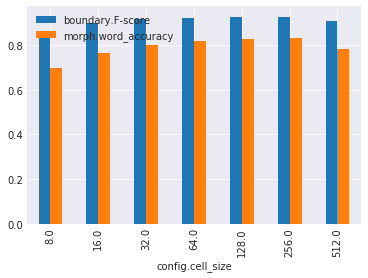

In [121]:
lstm_results.groupby('config.cell_size').max()[res_cols].plot(kind='bar', y=['boundary.F-score', 'morph.word_accuracy'])
lstm_results.groupby('config.cell_size').mean()[res_cols]

In [122]:
lstm_results.groupby('config.embedding_size').max()[res_cols]

,boundary.precision,boundary.recall,boundary.F-score,morph.accuracy,morph.precision,morph.recall,morph.F-score,morph.word_accuracy
config.embedding_size,,,,,,,,
5.0,0.927739,0.918131,0.919591,0.773522,0.873114,0.871488,0.872300,0.8076
10.0,0.928197,0.910509,0.915874,0.765901,0.870433,0.864454,0.867433,0.8021
20.0,0.932278,0.922366,0.925337,0.790241,0.884500,0.881170,0.882832,0.8253
30.0,0.940408,0.925612,0.927217,0.795461,0.893384,0.879681,0.886080,0.8303
40.0,0.935127,0.920601,0.926299,0.792565,0.889182,0.880715,0.884280,0.8282


## Best CNN

In [30]:
hp_params = [
    'cell_type', 'cell_size', 'embedding_size', 'bidirectional', 'num_layers', 'layers',
    'batch_size',
]
hp_params = ['config.{}'.format(c) for c in hp_params]

In [31]:
boundary_best = cnn_results[res_cols + hp_params].loc[cnn_results['boundary.F-score'].idxmax()].to_frame().dropna()
boundary_best

,239
boundary.precision,0.924944
boundary.recall,0.930623
boundary.F-score,0.927775
morph.accuracy,0.794648
morph.precision,0.883987
morph.recall,0.88717
morph.F-score,0.885576
morph.word_accuracy,0.8273
config.cell_type,LSTM
config.cell_size,256


In [32]:
eval(boundary_best.loc['config.layers'].iloc[0])

[{'activation': 'relu',
  'filters': 100,
  'kernel_size': 10,
  'padding': 'same',
  'strides': 1}]

In [33]:
s = boundary_best.loc[res_cols].rename(
    columns={'morph.word_accuracy': 'word accuracy'}
).to_latex(header=False)
with open("szeged/cnn_best.tex", 'w') as f:
    f.write(s)

In [34]:
morph_best = cnn_results[res_cols + hp_params].loc[cnn_results['morph.F-score'].idxmax()].to_frame().dropna()
morph_best

,239
boundary.precision,0.924944
boundary.recall,0.930623
boundary.F-score,0.927775
morph.accuracy,0.794648
morph.precision,0.883987
morph.recall,0.88717
morph.F-score,0.885576
morph.word_accuracy,0.8273
config.cell_type,LSTM
config.cell_size,256


In [123]:
cnn_results.groupby('config.num_layers').max()[res_cols]

,boundary.precision,boundary.recall,boundary.F-score,morph.accuracy,morph.precision,morph.recall,morph.F-score,morph.word_accuracy
config.num_layers,,,,,,,,
1,0.931292,0.920531,0.918101,0.769028,0.871264,0.870785,0.869436,0.8027
2,0.924944,0.930623,0.927775,0.794648,0.883987,0.887170,0.885576,0.8273
3,1.000000,0.905074,0.898606,0.723854,0.852295,0.843353,0.839809,0.7583
4,0.934158,0.907262,0.910636,0.753099,0.861037,0.857297,0.859163,0.7889
5,1.000000,0.910650,0.911269,0.752727,0.864082,0.857793,0.858921,0.7873


In [36]:
cnn_results['config.sum_filters'] = cnn_results['config.layers'].apply(lambda x: sum((l['filters']) for l in eval(x)))

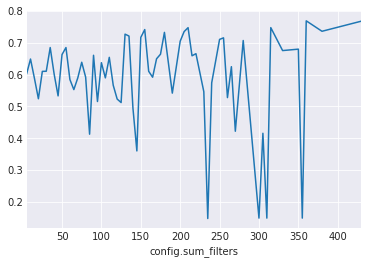

In [37]:
cnn_results.groupby('config.sum_filters').mean()['morph.word_accuracy'].plot()

In [124]:
cnn_results['config.minkernel'] = cnn_results['config.layers'].apply(
    lambda x: min(l['kernel_size'] for l in eval(x)))
cnn_results['config.maxkernel'] = cnn_results['config.layers'].apply(
    lambda x: max(l['kernel_size'] for l in eval(x)))

In [125]:
b = cnn_results.groupby('config.minkernel')[res_cols].max()[
    ['boundary.F-score', 'morph.F-score', 'morph.word_accuracy']]
s = b.reset_index().rename(columns={
    'config.minkernel': 'Minimum kernel',
    'morph.word_accuracy': 'Word accuracy',
    'boundary.F-score': 'Boundary F-score',
    'morph.F-score': 'Morph F-score',
}).to_latex(index=False, bold_rows=True)
with open("szeged/minkernel.tex", 'w') as f:
    f.write(s)

In [40]:
b = cnn_results.groupby('config.maxkernel')[res_cols].max()[
    ['boundary.F-score', 'morph.F-score', 'morph.word_accuracy']]
s = b.reset_index().rename(columns={
    'config.maxkernel': 'Maximum kernel',
    'morph.word_accuracy': 'Word accuracy',
    'boundary.F-score': 'Boundary F-score',
    'morph.F-score': 'Morph F-score',
}).to_latex(index=False, bold_rows=True)
with open("szeged/maxkernel.tex", 'w') as f:
    f.write(s)

In [126]:
cnn_results.groupby('config.minkernel').max()[res_cols]

,boundary.precision,boundary.recall,boundary.F-score,morph.accuracy,morph.precision,morph.recall,morph.F-score,morph.word_accuracy
config.minkernel,,,,,,,,
1,1.000000,0.905498,0.903006,0.736653,0.852295,0.846622,0.848359,0.7732
2,0.934158,0.905427,0.910472,0.753502,0.871264,0.856469,0.859425,0.7925
5,0.920689,0.915096,0.911269,0.752727,0.864082,0.859614,0.858921,0.7873
10,0.924944,0.930623,0.927775,0.794648,0.883987,0.887170,0.885576,0.8273


In [127]:
cnn_results['result.running_time'].mean() / 60

13.448568285562988

In [129]:
cnn_results['result.running_time'].describe()

count     299.000000
mean      806.914097
std       464.928460
min        66.373190
25%       557.820638
50%       716.430526
75%      1082.524136
max      3781.732782
Name: result.running_time, dtype: float64

In [135]:
cnn_results.loc[cnn_results['result.running_time'].argmax()].loc['config.layers']

"[{'padding': 'same', 'filters': 10, 'kernel_size': 10, 'strides': 1, 'activation': 'sigmoid'}, {'padding': 'same', 'filters': 30, 'kernel_size': 10, 'strides': 1, 'activation': 'relu'}, {'padding': 'same', 'filters': 100, 'kernel_size': 5, 'strides': 1, 'activation': 'sigmoid'}]"

In [43]:
cnn_results['result.early_stopped'] = (cnn_results['result.epochs_run'] < 100)
c = cnn_results.groupby('result.early_stopped').size()
c

result.early_stopped
False    120
True     179
dtype: int64

In [44]:
c / c.sum()

result.early_stopped
False    0.401338
True     0.598662
dtype: float64

In [45]:
lstm_results['result.running_time'].mean() / 60

38.702237634077889

In [46]:
lstm_results['result.early_stopped'] = (lstm_results['result.epochs_run'] < 100)
l = lstm_results.groupby('result.early_stopped').size()
l

result.early_stopped
False    104
True     187
dtype: int64

In [47]:
l / l.sum()

result.early_stopped
False    0.357388
True     0.642612
dtype: float64

In [48]:
cnn_results['result.epochs_run'].describe()

count    299.000000
mean      77.645485
std       28.007814
min        6.000000
25%       63.500000
50%       90.000000
75%      100.000000
max      100.000000
Name: result.epochs_run, dtype: float64